In [1]:
import sys 
import os 
import numpy as np
import pandas as pd
import sklearn as sk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics as metrics_sk
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp
from IPython.display import Image, display_svg, SVG
import joblib

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
os.chdir("C:/Users/Benedito/Desktop/MECAI/Introdução a Estatistica/MVP")

In [4]:
data = pd.read_csv("./final_model/scored_final_table.csv")

In [5]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,SUM(previous.CNT_PAYMENT),amt_credit_sum_consumer_credit_bureau,avg_pos_cash_cnt_installment_future_previous,CODE_GENDER_M,amt_credit_sum_debt_credit_card_bureau,cnt_refused_previous,NAME_CONTRACT_TYPE_Revolving loans,max_pos_cash_sk_dpd_def_previous,SUM(previous.DAYS_FIRST_DRAWING),amt_paid_down,NAME_EDUCATION_TYPE_Higher education,STD(previous.DAYS_FIRST_DRAWING),NAME_FAMILY_STATUS_Married,MIN(previous.CNT_PAYMENT),cnt_yield_low_normal_previous,avg_amt_application_previous,credit_income_ratio,remaining_pmts,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,missing_rate,REGION_RATING_CLIENT_W_CITY_2,COUNT(bureau),gap_avg_application_credit_previous,days_phone_change_over_gap_amt_installment,FLAG_OWN_CAR_Y,avg_pos_cash_cnt_installment_previous,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_MODE,UI_credit_card_bureau,ENTRANCES_AVG,num_loans_l1m,STD(bureau.CREDIT_DAY_OVERDUE),STD(previous.AMT_GOODS_PRICE),max_interest_rate_privileged_previous,cnt_contracts_bureau,SKEW(previous.DAYS_TERMINATION),MEAN(previous.DAYS_LAST_DUE_1ST_VERSION),MIN(previous.AMT_APPLICATION),MIN(bureau.DAYS_CREDIT),delinquency_6_mths_consumer_credit_bureau,MAX(previous.DAYS_FIRST_DRAWING),NAME_EDUCATION_TYPE_Lower secondary,MIN(previous.HOUR_APPR_PROCESS_START),avg_amt_credit_card_receivable_principal_previous,MEAN(bureau.AMT_CREDIT_SUM),amt_credit_max_overdue_bureau,DAYS_ID_PUBLISH,tot_debt_lim_ratio,avg_amt_credit_card_total_receivable_previous,max_interest_rate_primary_previous,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),num_loans_l6m,STD(bureau.DAYS_CREDIT),MEAN(previous.RATE_INTEREST_PRIMARY),FLOORSMIN_AVG,SUM(bureau.AMT_CREDIT_SUM_DEBT),avg_cnt_credit_card_drawings_atm_previous,APARTMENTS_MEDI,LIVINGAREA_MODE,delinquency_12_24_mths_microloan_bureau,SKEW(bureau.DAYS_CREDIT),LANDAREA_AVG,num_loans_l3m,FLAG_DOCUMENT_13,MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(previous.CNT_PAYMENT),delinquency_6_12_mths_credit_card_bureau,MAX(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(previous.AMT_CREDIT),MAX(bureau.DAYS_CREDIT_UPDATE),WALLSMATERIAL_MODE_Monolithic,avg_amt_credit_card_drawings_atm_previous,MEDIAN(previous.CNT_PAYMENT),avg_cnt_credit_card_instalment_mature_cum_previous,FLAG_PHONE,YEARS_BEGINEXPLUATATION_AVG,SUM(previous.DAYS_TERMINATION),income_over_credit,days_phone_change_times_gap_days_installment,SUM(previous.AMT_GOODS_PRICE),LANDAREA_MEDI,max_cnt_payment_previous,SUM(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(previous.NFLAG_LAST_APPL_IN_DAY),MIN(previous.RATE_DOWN_PAYMENT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SUM(previous.RATE_DOWN_PAYMENT),cnt_portfolio_cash_previous,MEDIAN(bureau.CNT_CREDIT_PROLONG),SKEW(previous.DAYS_DECISION),NAME_INCOME_TYPE_State servant,STD(previous.AMT_CREDIT),MEAN(bureau.DAYS_ENDDATE_FACT),NAME_TYPE_SUITE_Other_A,FLOORSMIN_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),NONLIVINGAREA_MEDI,delinquency_6_12_mths_microloan_bureau,avg_amt_credit_card_recivable_previous,delinquency_long_total_bureau,FLAG_WORK_PHONE,cnt_channel_contact_center_previous,SUM(previous.DAYS_FIRST_DUE),OWN_CAR_AGE,AMT_GOODS_PRICE,cnt_appl_previous,delinquency_12_24_mths_consumer_credit_bureau,cnt_cash_previous,NAME_TYPE_SUITE_Family,MEAN(previous.AMT_DOWN_PAYMENT),FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,cnt_seller_furniture_previous,delinquency_6_12_mths_total_bureau,CODE_GENDER_XNA,amt_credit_sum_working_capital_bureau,MEDIAN(previous.RATE_DOWN_PAYMENT),DAYS_REGISTRATION,DEF_60_CNT_SOCIAL_CIRCLE,SUM(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_ENDDATE),delinquency_24_36_mths_consumer_credit_bureau,MAX(previous.AMT_DOWN_PAYMENT),UI_credit_sum_total_bureau,SKEW(bureau.DAYS_ENDDATE_FACT),SKEW(previous.AMT_DOWN_PAYMENT),NAME_INCOME_TYPE_Student,MEDIAN(bureau.DAYS_CREDIT_UPDATE),credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,max_credit_card_sk_dpd_def_previous

In [6]:
print("DECISION TREE")
print("\n")
print('ACCURACY', metrics_sk.accuracy_score(data['TARGET'], data['predicted_tree']))
print('AUC', metrics_sk.roc_auc_score(data['TARGET'], data['score_tree']))
print('PRECISION', metrics_sk.precision_score(data['TARGET'], data['predicted_tree']))
print('RECALL', metrics_sk.recall_score(data['TARGET'], data['predicted_tree']))
print('F1', metrics_sk.f1_score(data['TARGET'], data['predicted_tree']))
print("\n\n")

print("LIGHTGBM")
print("\n")
print('ACCURACY', metrics_sk.accuracy_score(data['TARGET'], data['predicted_LGBM']))
print('AUC', metrics_sk.roc_auc_score(data['TARGET'], data['score_LGBM']))
print('PRECISION', metrics_sk.precision_score(data['TARGET'], data['predicted_LGBM']))
print('RECALL', metrics_sk.recall_score(data['TARGET'], data['predicted_LGBM']))
print('F1', metrics_sk.f1_score(data['TARGET'], data['predicted_LGBM']))
print("\n\n")

print("NEURAL NETWORK")
print("\n")
print('ACCURACY', metrics_sk.accuracy_score(data['TARGET'], data['predicted_NN']))
print('AUC', metrics_sk.roc_auc_score(data['TARGET'], data['score_NN']))
print('PRECISION', metrics_sk.precision_score(data['TARGET'], data['predicted_NN']))
print('RECALL', metrics_sk.recall_score(data['TARGET'], data['predicted_NN']))
print('F1', metrics_sk.f1_score(data['TARGET'], data['predicted_NN']))
print("\n\n")

print("OPTIMIZING F1 SCORE")
print("\n")
print('ACCURACY', metrics_sk.accuracy_score(data['TARGET'], data['predicted_opt_F1']))
print('AUC', metrics_sk.roc_auc_score(data['TARGET'], data['score_opt_F1']))
print('PRECISION', metrics_sk.precision_score(data['TARGET'], data['predicted_opt_F1']))
print('RECALL', metrics_sk.recall_score(data['TARGET'], data['predicted_opt_F1']))
print('F1', metrics_sk.f1_score(data['TARGET'], data['predicted_opt_F1']))
print("\n\n")

DECISION TREE


ACCURACY 0.8813115628384025
AUC 0.6123920969778622
PRECISION 0.09062215052255032
RECALL 0.05204431017119839
F1 0.06611739419681695



LIGHTGBM


ACCURACY 0.921261353252404
AUC 0.8127503758560549
PRECISION 0.6696230598669624
RECALL 0.04866062437059416
F1 0.09072815351684253



NEURAL NETWORK


ACCURACY 0.704517887165012
AUC 0.7818117092957481
PRECISION 0.17644753216465953
RECALL 0.7253575025176233
F1 0.28384747552767225



OPTIMIZING F1 SCORE


ACCURACY 0.881620494876606
AUC 0.7888191784807741
PRECISION 0.304636879049676
RECALL 0.36362537764350455
F1 0.33152762730227514





## Some visualizations

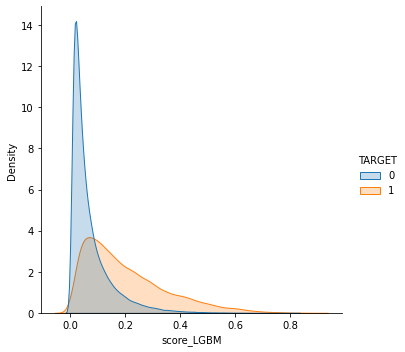

In [7]:
sns.displot(data, x="score_LGBM", hue="TARGET", kind = 'kde', fill = True, common_norm = False)#stat = 'probability', common_norm = False)

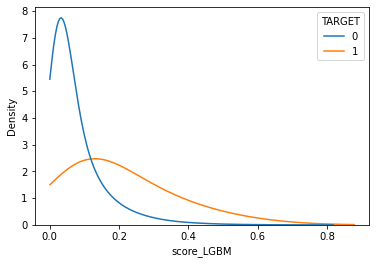

In [8]:
ax= sns.kdeplot(data=data, x="score_LGBM", hue = "TARGET", common_norm = False,  bw_adjust=5, cut=0)

<AxesSubplot:xlabel='score_NN', ylabel='Density'>

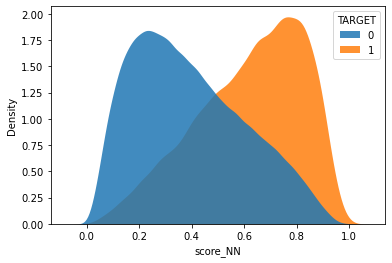

In [14]:
sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.kdeplot(
   data=data, x="score_NN", hue="TARGET",
   fill=True, common_norm=False, #palette=a,
   alpha=0.85, linewidth=0,
)

<AxesSubplot:xlabel='TARGET', ylabel='score_NN'>

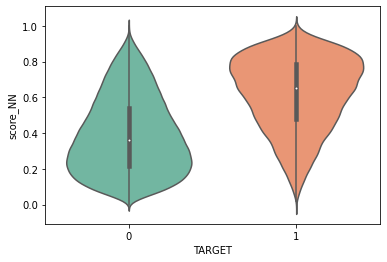

In [24]:
sns.violinplot(x="TARGET", y="score_NN", data=data, order=[0, 1], palette="Set2")

<AxesSubplot:xlabel='TARGET', ylabel='score_LGBM'>

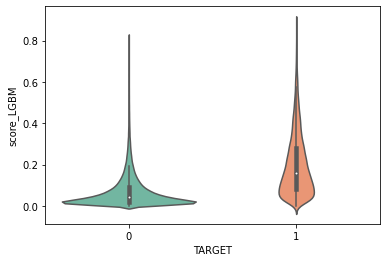

In [25]:
sns.violinplot(x="TARGET", y="score_LGBM", data=data, order=[0, 1], palette="Set2")

<AxesSubplot:xlabel='TARGET', ylabel='score_opt_F1'>

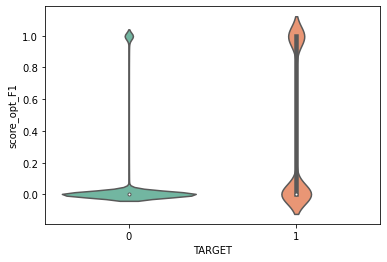

In [26]:
sns.violinplot(x="TARGET", y="score_opt_F1", data=data, order=[0, 1], palette="Set2")

In [27]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

In [ ]:
sns.kdeplot(
    data=data, x="mean_knn_target", y="cnt_refused_previous", hue="TARGET", fill=True,
)


In [32]:
from __future__ import division
from textwrap import dedent
import colorsys
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib as mpl
from matplotlib.collections import PatchCollection
import matplotlib.patches as Patches
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import warnings

import seaborn as sns

#from seaborn.external.six import string_types
#from seaborn.external.six.moves import range

from seaborn import utils
from seaborn._core import categorical_order
from scipy.stats import iqr
from seaborn.utils import remove_na
from seaborn.algorithms import bootstrap
from seaborn.palettes import color_palette, husl_palette, light_palette, dark_palette
from seaborn.axisgrid import FacetGrid, _facet_docs

from seaborn.categorical import *
from seaborn.categorical import _CategoricalPlotter, _CategoricalScatterPlotter,  _categorical_docs

__all__ = [ "half_violinplot", "stripplot", "RainCloud"]
__version__ = '0.2.5'

class _StripPlotter(_CategoricalScatterPlotter):
    """1-d scatterplot with categorical organization."""
    def __init__(self, x, y, hue, data, order, hue_order,
                 jitter, dodge, orient, color, palette, width, move):
        """Initialize the plotter."""
        self.establish_variables(x, y, hue, data, orient, order, hue_order)
        self.establish_colors(color, palette, 1)

        # Set object attributes
        self.dodge = dodge
        self.width = width
        self.move = move

        if jitter == 1:  # Use a good default for `jitter = True`
            jlim = 0.1
        else:
            jlim = float(jitter)
        if self.hue_names is not None and dodge:
            jlim /= len(self.hue_names)
        self.jitterer = stats.uniform(-jlim, jlim * 2).rvs

    def draw_stripplot(self, ax, kws):
        """Draw the points onto `ax`."""
        palette = np.asarray(self.colors)
        for i, group_data in enumerate(self.plot_data):
            if self.plot_hues is None or not self.dodge:

                if self.hue_names is None:
                    hue_mask = np.ones(group_data.size, np.bool)
                else:
                    hue_mask = np.array([h in self.hue_names
                                         for h in self.plot_hues[i]], np.bool)

                strip_data = group_data[hue_mask]
                point_colors = np.asarray(self.point_colors[i][hue_mask])

                # Plot the points in centered positions
                cat_pos = self.move + np.ones(strip_data.size) * i
                cat_pos += self.jitterer(len(strip_data))
                kws.update(c=palette[point_colors])

                if self.orient == "v":
                    ax.scatter(cat_pos, strip_data, **kws)
                else:
                    ax.scatter(strip_data, cat_pos, **kws)

            else:
                offsets = self.hue_offsets
                for j, hue_level in enumerate(self.hue_names):
                    hue_mask = self.plot_hues[i] == hue_level
                    strip_data = group_data[hue_mask]

                    point_colors = np.asarray(self.point_colors[i][hue_mask])
                    # Plot the points in centered positions
                    center = i + offsets[j]
                    cat_pos = self.move + np.ones(strip_data.size) * center
                    cat_pos += self.jitterer(len(strip_data))
                    kws.update(c=palette[point_colors])
                    if self.orient == "v":
                        ax.scatter(cat_pos, strip_data, **kws)
                    else:
                        ax.scatter(strip_data, cat_pos, **kws)

    def plot(self, ax, kws):
        """Make the plot."""
        self.draw_stripplot(ax, kws)
        self.add_legend_data(ax)
        self.annotate_axes(ax)
        if self.orient == "h":
            ax.invert_yaxis()


class _Half_ViolinPlotter(_CategoricalPlotter):

    def __init__(self, x, y, hue, data, order, hue_order,
                 bw, cut, scale, scale_hue, gridsize,
                 width, inner, split, dodge, orient, linewidth,
                 color, palette, saturation, offset):

        self.establish_variables(x, y, hue, data, orient, order, hue_order)
        self.establish_colors(color, palette, saturation)
        self.estimate_densities(bw, cut, scale, scale_hue, gridsize)

        self.gridsize = gridsize
        self.width = width
        self.dodge = dodge
        self.offset = offset

        if inner is not None:
            if not any([inner.startswith("quart"),
                        inner.startswith("box"),
                        inner.startswith("stick"),
                        inner.startswith("point")]):
                err = "Inner style '{}' not recognized".format(inner)
                raise ValueError(err)
        self.inner = inner

        if split and self.hue_names is not None and len(self.hue_names) < 2:
            msg = "There must be at least two hue levels to use `split`.'"
            raise ValueError(msg)
        self.split = split

        if linewidth is None:
            linewidth = mpl.rcParams["lines.linewidth"]
        self.linewidth = linewidth

    def estimate_densities(self, bw, cut, scale, scale_hue, gridsize):
        """Find the support and density for all of the data."""
        # Initialize data structures to keep track of plotting data
        if self.hue_names is None:
            support = []
            density = []
            counts = np.zeros(len(self.plot_data))
            max_density = np.zeros(len(self.plot_data))
        else:
            support = [[] for _ in self.plot_data]
            density = [[] for _ in self.plot_data]
            size = len(self.group_names), len(self.hue_names)
            counts = np.zeros(size)
            max_density = np.zeros(size)

        for i, group_data in enumerate(self.plot_data):

            # Option 1: we have a single level of grouping
            # --------------------------------------------

            if self.plot_hues is None:

                # Strip missing datapoints
                kde_data = remove_na(group_data)

                # Handle special case of no data at this level
                if kde_data.size == 0:
                    support.append(np.array([]))
                    density.append(np.array([1.]))
                    counts[i] = 0
                    max_density[i] = 0
                    continue

                # Handle special case of a single unique datapoint
                elif np.unique(kde_data).size == 1:
                    support.append(np.unique(kde_data))
                    density.append(np.array([1.]))
                    counts[i] = 1
                    max_density[i] = 0
                    continue

                # Fit the KDE and get the used bandwidth size
                kde, bw_used = self.fit_kde(kde_data, bw)

                # Determine the support grid and get the density over it
                support_i = self.kde_support(kde_data, bw_used, cut, gridsize)
                density_i = kde.evaluate(support_i)

                # Update the data structures with these results
                support.append(support_i)
                density.append(density_i)
                counts[i] = kde_data.size
                max_density[i] = density_i.max()

            # Option 2: we have nested grouping by a hue variable
            # ---------------------------------------------------

            else:
                for j, hue_level in enumerate(self.hue_names):

                    # Handle special case of no data at this category level
                    if not group_data.size:
                        support[i].append(np.array([]))
                        density[i].append(np.array([1.]))
                        counts[i, j] = 0
                        max_density[i, j] = 0
                        continue

                    # Select out the observations for this hue level
                    hue_mask = self.plot_hues[i] == hue_level

                    # Strip missing datapoints
                    kde_data = remove_na(group_data[hue_mask])

                    # Handle special case of no data at this level
                    if kde_data.size == 0:
                        support[i].append(np.array([]))
                        density[i].append(np.array([1.]))
                        counts[i, j] = 0
                        max_density[i, j] = 0
                        continue

                    # Handle special case of a single unique datapoint
                    elif np.unique(kde_data).size == 1:
                        support[i].append(np.unique(kde_data))
                        density[i].append(np.array([1.]))
                        counts[i, j] = 1
                        max_density[i, j] = 0
                        continue

                    # Fit the KDE and get the used bandwidth size
                    kde, bw_used = self.fit_kde(kde_data, bw)

                    # Determine the support grid and get the density over it
                    support_ij = self.kde_support(kde_data, bw_used,
                                                  cut, gridsize)
                    density_ij = kde.evaluate(support_ij)

                    # Update the data structures with these results
                    support[i].append(support_ij)
                    density[i].append(density_ij)
                    counts[i, j] = kde_data.size
                    max_density[i, j] = density_ij.max()

        # Scale the height of the density curve.
        # For a violinplot the density is non-quantitative.
        # The objective here is to scale the curves relative to 1 so that
        # they can be multiplied by the width parameter during plotting.

        if scale == "area":
            self.scale_area(density, max_density, scale_hue)

        elif scale == "width":
            self.scale_width(density)

        elif scale == "count":
            self.scale_count(density, counts, scale_hue)

        else:
            raise ValueError("scale method '{}' not recognized".format(scale))

        # Set object attributes that will be used while plotting
        self.support = support
        self.density = density

    def fit_kde(self, x, bw):
        """Estimate a KDE for a vector of data with flexible bandwidth."""
        # Allow for the use of old scipy where `bw` is fixed
        try:
            kde = stats.gaussian_kde(x, bw)
        except TypeError:
            kde = stats.gaussian_kde(x)
            if bw != "scott":  # scipy default
                msg = ("Ignoring bandwidth choice, "
                       "please upgrade scipy to use a different bandwidth.")
                warnings.warn(msg, UserWarning)

        # Extract the numeric bandwidth from the KDE object
        bw_used = kde.factor

        # At this point, bw will be a numeric scale factor.
        # To get the actual bandwidth of the kernel, we multiple by the
        # unbiased standard deviation of the data, which we will use
        # elsewhere to compute the range of the support.
        bw_used = bw_used * x.std(ddof=1)

        return kde, bw_used

    def kde_support(self, x, bw, cut, gridsize):
        """Define a grid of support for the violin."""
        support_min = x.min() - bw * cut
        support_max = x.max() + bw * cut
        return np.linspace(support_min, support_max, gridsize)

    def scale_area(self, density, max_density, scale_hue):
        """Scale the relative area under the KDE curve.
        This essentially preserves the "standard" KDE scaling, but the
        resulting maximum density will be 1 so that the curve can be
        properly multiplied by the violin width.
        """
        if self.hue_names is None:
            for d in density:
                if d.size > 1:
                    d /= max_density.max()
        else:
            for i, group in enumerate(density):
                for d in group:
                    if scale_hue:
                        max = max_density[i].max()
                    else:
                        max = max_density.max()
                    if d.size > 1:
                        d /= max

    def scale_width(self, density):
        """Scale each density curve to the same height."""
        if self.hue_names is None:
            for d in density:
                d /= d.max()
        else:
            for group in density:
                for d in group:
                    d /= d.max()

    def scale_count(self, density, counts, scale_hue):
        """Scale each density curve by the number of observations."""
        if self.hue_names is None:
            if counts.max() == 0:
                d = 0
            else:
                for count, d in zip(counts, density):
                    d /= d.max()
                    d *= count / counts.max()
        else:
            for i, group in enumerate(density):
                for j, d in enumerate(group):
                    if counts[i].max() == 0:
                        d = 0
                    else:
                        count = counts[i, j]
                        if scale_hue:
                            scaler = count / counts[i].max()
                        else:
                            scaler = count / counts.max()
                        d /= d.max()
                        d *= scaler

    @property
    def dwidth(self):

        if self.hue_names is None or not self.dodge:
            return self.width / 2
        elif self.split:
            return self.width / 2
        else:
            return self.width / (2 * len(self.hue_names))

    def draw_violins(self, ax, kws):
        """Draw the violins onto `ax`."""
        fill_func = ax.fill_betweenx if self.orient == "v" else ax.fill_between
        for i, group_data in enumerate(self.plot_data):

            kws.update(dict(edgecolor=self.gray, linewidth=self.linewidth))

            # Option 1: we have a single level of grouping
            # --------------------------------------------

            if self.plot_hues is None:

                support, density = self.support[i], self.density[i]

                # Handle special case of no observations in this bin
                if support.size == 0:
                    continue

                # Handle special case of a single observation
                elif support.size == 1:
                    val = np.asscalar(support)
                    d = np.asscalar(density)
                    self.draw_single_observation(ax, i, val, d)
                    continue

                # Draw the violin for this group
                grid = np.ones(self.gridsize) * i
                fill_func(support,
                          -self.offset + grid - density * self.dwidth,
                          -self.offset + grid,
                          facecolor=self.colors[i],
                          **kws)

                # Draw the interior representation of the data
                if self.inner is None:
                    continue

                # Get a nan-free vector of datapoints
                violin_data = remove_na(group_data)

                # Draw box and whisker information
                if self.inner.startswith("box"):
                    self.draw_box_lines(ax, violin_data, support, density, i)

                # Draw quartile lines
                elif self.inner.startswith("quart"):
                    self.draw_quartiles(ax, violin_data, support, density, i)

                # Draw stick observations
                elif self.inner.startswith("stick"):
                    self.draw_stick_lines(ax, violin_data, support, density, i)

                # Draw point observations
                elif self.inner.startswith("point"):
                    self.draw_points(ax, violin_data, i)

            # Option 2: we have nested grouping by a hue variable
            # ---------------------------------------------------

            else:
                offsets = self.hue_offsets
                for j, hue_level in enumerate(self.hue_names):

                    support, density = self.support[i][j], self.density[i][j]
                    kws["facecolor"] = self.colors[j]

                    # Add legend data, but just for one set of violins
                    if not i:
                        self.add_legend_data(ax, self.colors[j], hue_level)

                    # Handle the special case where we have no observations
                    if support.size == 0:
                        continue

                    # Handle the special case where we have one observation
                    elif support.size == 1:
                        val = np.asscalar(support)
                        d = np.asscalar(density)
                        if self.split:
                            d = d / 2
                        at_group = i + offsets[j]
                        self.draw_single_observation(ax, at_group, val, d)
                        continue

                    # Option 2a: we are drawing a single split violin
                    # -----------------------------------------------

                    if self.split:

                        grid = np.ones(self.gridsize) * i
                        if j:
                            fill_func(support,
                                      -self.offset + grid - density * self.dwidth,
                                      -self.offset + grid,
                                      **kws)
                        else:
                            fill_func(support,
                                      -self.offset + grid - density * self.dwidth,
                                      -self.offset + grid,
                                      **kws)

                        # Draw the interior representation of the data
                        if self.inner is None:
                            continue

                        # Get a nan-free vector of datapoints
                        hue_mask = self.plot_hues[i] == hue_level
                        violin_data = remove_na(group_data[hue_mask])

                        # Draw quartile lines
                        if self.inner.startswith("quart"):
                            self.draw_quartiles(ax, violin_data,
                                                support, density, i,
                                                ["left", "right"][j])

                        # Draw stick observations
                        elif self.inner.startswith("stick"):
                            self.draw_stick_lines(ax, violin_data,
                                                  support, density, i,
                                                  ["left", "right"][j])

                        # The box and point interior plots are drawn for
                        # all data at the group level, so we just do that once
                        if not j:
                            continue

                        # Get the whole vector for this group level
                        violin_data = remove_na(group_data)

                        # Draw box and whisker information
                        if self.inner.startswith("box"):
                            self.draw_box_lines(ax, violin_data,
                                                support, density, i)

                        # Draw point observations
                        elif self.inner.startswith("point"):
                            self.draw_points(ax, violin_data, i)

                    # Option 2b: we are drawing full nested violins
                    # -----------------------------------------------

                    else:
                        grid = np.ones(self.gridsize) * (i + offsets[j])
                        fill_func(support,
                                  -self.offset + grid - density * self.dwidth,
                                  -self.offset + grid,
                                  **kws)

                        # Draw the interior representation
                        if self.inner is None:
                            continue

                        # Get a nan-free vector of datapoints
                        hue_mask = self.plot_hues[i] == hue_level
                        violin_data = remove_na(group_data[hue_mask])

                        # Draw box and whisker information
                        if self.inner.startswith("box"):
                            self.draw_box_lines(ax, violin_data,
                                                support, density,
                                                i + offsets[j])

                        # Draw quartile lines
                        elif self.inner.startswith("quart"):
                            self.draw_quartiles(ax, violin_data,
                                                support, density,
                                                i + offsets[j])

                        # Draw stick observations
                        elif self.inner.startswith("stick"):
                            self.draw_stick_lines(ax, violin_data,
                                                  support, density,
                                                  i + offsets[j])

                        # Draw point observations
                        elif self.inner.startswith("point"):
                            self.draw_points(ax, violin_data, i + offsets[j])

    def draw_single_observation(self, ax, at_group, at_quant, density):
        """Draw a line to mark a single observation."""
        d_width = density * self.dwidth
        if self.orient == "v":
            ax.plot([at_group - d_width, at_group + d_width],
                    [at_quant, at_quant],
                    color=self.gray,
                    linewidth=self.linewidth)
        else:
            ax.plot([at_quant, at_quant],
                    [at_group - d_width, at_group + d_width],
                    color=self.gray,
                    linewidth=self.linewidth)

    def draw_box_lines(self, ax, data, support, density, center):
        """Draw boxplot information at center of the density."""
        # Compute the boxplot statistics
        q25, q50, q75 = np.percentile(data, [25, 50, 75])
        whisker_lim = 1.5 * iqr(data)
        h1 = np.min(data[data >= (q25 - whisker_lim)])
        h2 = np.max(data[data <= (q75 + whisker_lim)])

        # Draw a boxplot using lines and a point
        if self.orient == "v":
            ax.plot([center, center], [h1, h2],
                    linewidth=self.linewidth,
                    color=self.gray)
            ax.plot([center, center], [q25, q75],
                    linewidth=self.linewidth * 3,
                    color=self.gray)
            ax.scatter(center, q50,
                       zorder=3,
                       color="white",
                       edgecolor=self.gray,
                       s=np.square(self.linewidth * 2))
        else:
            ax.plot([h1, h2], [center, center],
                    linewidth=self.linewidth,
                    color=self.gray)
            ax.plot([q25, q75], [center, center],
                    linewidth=self.linewidth * 3,
                    color=self.gray)
            ax.scatter(q50, center,
                       zorder=3,
                       color="white",
                       edgecolor=self.gray,
                       s=np.square(self.linewidth * 2))

    def draw_quartiles(self, ax, data, support, density, center, split=False):
        """Draw the quartiles as lines at width of density."""
        q25, q50, q75 = np.percentile(data, [25, 50, 75])

        self.draw_to_density(ax, center, q25, support, density, split,
                             linewidth=self.linewidth,
                             dashes=[self.linewidth * 1.5] * 2)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth,
                             dashes=[self.linewidth * 3] * 2)
        self.draw_to_density(ax, center, q75, support, density, split,
                             linewidth=self.linewidth,
                             dashes=[self.linewidth * 1.5] * 2)

    def draw_points(self, ax, data, center):
        """Draw individual observations as points at middle of the violin."""
        kws = dict(s=np.square(self.linewidth * 2),
                   color=self.gray,
                   edgecolor=self.gray)

        grid = np.ones(len(data)) * center

        if self.orient == "v":
            ax.scatter(grid, data, **kws)
        else:
            ax.scatter(data, grid, **kws)

    def draw_stick_lines(self, ax, data, support, density,
                         center, split=False):
        """Draw individual observations as sticks at width of density."""
        for val in data:
            self.draw_to_density(ax, center, val, support, density, split,
                                 linewidth=self.linewidth * .5)

    def draw_to_density(self, ax, center, val, support, density, split, **kws):
        """Draw a line orthogonal to the value axis at width of density."""
        idx = np.argmin(np.abs(support - val))
        width = self.dwidth * density[idx] * .99

        kws["color"] = self.gray

        if self.orient == "v":
            if split == "left":
                ax.plot([center - width, center], [val, val], **kws)
            elif split == "right":
                ax.plot([center, center + width], [val, val], **kws)
            else:
                ax.plot([center - width, center + width], [val, val], **kws)
        else:
            if split == "left":
                ax.plot([val, val], [center - width, center], **kws)
            elif split == "right":
                ax.plot([val, val], [center, center + width], **kws)
            else:
                ax.plot([val, val], [center - width, center + width], **kws)

    def plot(self, ax, kws):
        """Make the violin plot."""
        self.draw_violins(ax, kws)
        self.annotate_axes(ax)
        if self.orient == "h":
            ax.invert_yaxis()



def stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
              jitter=True, dodge=False, orient=None, color=None, palette=None, move = 0,
              size=5, edgecolor="gray", linewidth=0, ax=None, width=.8, **kwargs):

    if "split" in kwargs:
        dodge = kwargs.pop("split")
        msg = "The `split` parameter has been renamed to `dodge`."
        warnings.warn(msg, UserWarning)

    plotter = _StripPlotter(x, y, hue, data, order, hue_order,
                            jitter, dodge, orient, color, palette, width, move)
    if ax is None:
        ax = plt.gca()

    kwargs.setdefault("zorder", 3)
    size = kwargs.get("s", size)
    if linewidth is None:
        linewidth = size / 10
    if edgecolor == "gray":
        edgecolor = plotter.gray
    kwargs.update(dict(s=size ** 2,
                       edgecolor=edgecolor,
                       linewidth=linewidth))

    plotter.plot(ax, kwargs)
    return ax


def half_violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
               bw="scott", cut=2, scale="area", scale_hue=True, gridsize=100,
               width=.8, inner="box", split=False, dodge=True, orient=None,
               linewidth=None, color=None, palette=None, saturation=.75,
               ax=None, offset=.15, **kwargs):

    plotter = _Half_ViolinPlotter(x, y, hue, data, order, hue_order,
                             bw, cut, scale, scale_hue, gridsize,
                             width, inner, split, dodge, orient, linewidth,
                             color, palette, saturation, offset)

    if ax is None:
        ax = plt.gca()

    plotter.plot(ax, kwargs)
    return ax


def RainCloud(x = None, y = None, hue = None, data = None,
              order = None, hue_order = None,
              orient = "v", width_viol = .7, width_box = .15,
              palette = "Set2", bw = .2, linewidth = 1, cut = 0.,
              scale = "area", jitter = 1, move = 0., offset = None,
              point_size = 3, ax = None, pointplot = False,
              alpha = None, dodge = False, linecolor = 'red', **kwargs ):

    '''Draw a Raincloud plot of measure `y` of different categories `x`. Here `x` and `y` different columns of the pandas dataframe `data`.
    A raincloud is made of:
        1) "Cloud", kernel desity estimate, the half of a violinplot.
        2) "Rain", a stripplot below the cloud
        3) "Umberella", a boxplot
        4) "Thunder", a pointplot connecting the mean of the different categories (if `pointplot` is `True`)
    Main inputs:
        x           categorical data. Iterable, np.array, or dataframe column name if 'data' is specified
        y           measure data. Iterable, np.array, or dataframe column name if 'data' is specified
        hue         a second categorical data. Use it to obtain different clouds and rainpoints
        data        input pandas dataframe
        order       list, order of the categorical data
        hue_order   list, order of the hue
        orient      string, vertical if "v" (default), horizontal if "h"
        width_viol  float, width of the cloud
        width_box   float, width of the boxplot
        move        float, adjusts rain position to the x-axis (default value 0.)
        offset      float, adjusts cloud position to the x-axis
    kwargs can be passed to the [cloud (default), boxplot, rain/stripplot, pointplot]
    by preponing [cloud_, box_, rain_ point_] to the argument name.
    '''

    if orient == 'h': #swap x and y
        x, y = y, x
    if ax is None:
        ax = plt.gca()
        #f, ax = plt.subplots(figsize = figsize) old version had this

    if offset is None:
        offset = max(width_box/1.8,.15) + .05
    n_plots = 3
    split = False
    boxcolor = "black"
    boxprops = {'facecolor':'none', "zorder":10}
    if not hue is None:
        split = True
        boxcolor = palette
        boxprops = {"zorder":10}


    kwcloud = dict()
    kwbox   = dict(saturation = 1, whiskerprops = {'linewidth':2, "zorder":10} )
    kwrain  = dict(zorder = 0, edgecolor = "white")
    kwpoint = dict(capsize = 0., errwidth = 0., zorder = 20)
    for key, value in kwargs.items():
        if "cloud_" in key:
            kwcloud[key.replace("cloud_","")] = value
        elif "box_" in key:
            kwbox[key.replace("box_","")] = value
        elif "rain_" in key:
            kwrain[key.replace("rain_","")] = value
        elif "point_" in key:
            kwpoint[key.replace("point_","")] = value
        else:
            kwcloud[key] = value

    # Draw cloud/half-violin
    half_violinplot(x = x, y = y, hue = hue, data = data,
                         order = order, hue_order = hue_order,
                         orient = orient, width = width_viol,
                         inner = None, palette = palette, bw = bw,  linewidth = linewidth,
                         cut = cut, scale = scale, split = split, offset = offset, ax = ax, **kwcloud)

    # Draw umberella/boxplot
    sns.boxplot   (x = x, y = y, hue = hue, data = data, orient = orient, width = width_box,
                         order = order, hue_order = hue_order,
                         color = boxcolor, showcaps = True, boxprops = boxprops,
                         palette = palette, dodge = dodge, ax =ax, **kwbox)

    # Set alpha of the two
    if not alpha is None:
        _ = plt.setp(ax.collections + ax.artists, alpha = alpha)

    # Draw rain/stripplot
    ax =  stripplot (x = x, y = y, hue = hue, data = data, orient = orient,
                    order = order, hue_order = hue_order, palette = palette,
                    move = move, size = point_size, jitter = jitter, dodge = dodge,
                    width = width_box, ax = ax, **kwrain)

    # Add pointplot
    if pointplot:
        n_plots = 4
        if not hue is None:
            sns.pointplot(x = x, y = y, hue = hue, data = data,
                          orient = orient, order = order, hue_order = hue_order,
                          dodge = width_box/2., palette = palette, ax = ax, **kwpoint)
        else:
            sns.pointplot(x = x, y = y, hue = hue, data = data, color = linecolor,
                           orient = orient, order = order, hue_order = hue_order,
                           dodge = width_box/2., ax = ax, **kwpoint)

    # Prune the legend, add legend title
    if not hue is None:
        handles, labels = ax.get_legend_handles_labels()
        _ = plt.legend(handles[0:len(labels)//n_plots], labels[0:len(labels)//n_plots], \
                       bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., \
                       title = str(hue))#, title_fontsize = 25)

    # Adjust the ylim to fit (if needed)
    if orient == "h":
        ylim = list(ax.get_ylim())
        ylim[-1]  -= (width_box + width_viol)/4.
        _ = ax.set_ylim(ylim)
    elif orient == "v":
        xlim = list(ax.get_xlim())
        xlim[-1]  -= (width_box + width_viol)/4.
        _ = ax.set_xlim(xlim)

    return ax

Text(0.5, 1.0, 'Neural Network')

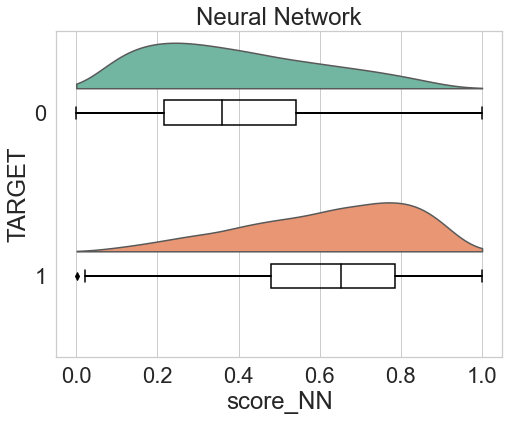

In [54]:
dy="TARGET"; dx="score_NN"; ort="h"; pal = sns.color_palette(n_colors=2)


f, ax = plt.subplots(figsize=(8, 6))
ax=half_violinplot( x = dx, y = dy, data = data, palette = 'Set2', bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = data, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)
plt.title("Neural Network")